In [1]:
print(1)

1


In [2]:
import torch

In [3]:
import os
import sys

# Get the current working directory (where the notebook is located)
notebook_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))

# Set the parent directory as the working directory
os.chdir(parent_dir)

# Optionally, you can add the parent directory to the system path
sys.path.append(parent_dir)

# Print the current working directory to verify
print("Current working directory:", os.getcwd())

Current working directory: /ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl


In [4]:
import importlib

# Import the augmenter module
from interpretable_ssl.augmenters import adata_augmenter
# Import the Swav trainer module
from interpretable_ssl.trainers import scpoli_trainer

from interpretable_ssl.trainers import swav
from interpretable_ssl.trainers import scpoli_original

# Reload the modules to ensure you have the latest version
importlib.reload(adata_augmenter)
importlib.reload(scpoli_trainer)
importlib.reload(swav)


INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/icb/fatemehs.hashemig/miniconda3/envs/apex-env/lib/python3.12/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)
 captum (see https://github.com/pytorch/captum).


<module 'interpretable_ssl.trainers.swav' from '/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/interpretable_ssl/trainers/swav.py'>

# knn, scanpy-knn, cell type

In [36]:
swav_object = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='scanpy_knn',
    epsilon=0.02,
    cvae_loss_scaler=0,
    prot_decoding_loss_scaler=0,
    model_version=1,
    dimensionality_reduction='pca',
    k_neighbors=50,
    experiment_name='seacell',
    workers=1
)


loading data


## init trainers to cmpare

In [43]:
knn = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='knn',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=0,
    model_version=1,
)

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [44]:
cell_type = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='cell_type',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=0,
    model_version=1,
)
scanpy_knn = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='scanpy_knn',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=0,
    model_version=1,
)
scanpy_knn.name = 'pca + scanpy_knn'

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
scpoli = scpoli_original.OriginalTrainer(latent_dims=8, batch_size=1024, debug=True, experiment_name = 'scpoli-pretrained')
scpoli.dump_path

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


'/home/icb/fatemehs.hashemig/models//pbmc-immune/scpoli-pretrained_latent8_bs1024'

In [13]:
isknn = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='scanpy_knn',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=5,
    model_version=1,
    
)
isknn.name = 'inter-scan-knn'

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
iknn = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='knn',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=5,
    model_version=1,
    
)
iknn.name = 'inter-knn'

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [21]:
seacell_sknn = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='scanpy_knn',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=5,
    model_version=1,
    experiment_name = 'seacell',
    k_neighbors=50, 
    dimensionality_reduction ='pca'
    
)
seacell_sknn.name = 'seacell-sknn'

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [31]:
com_sknn = swav.SwAV(
    num_prototypes=300,
    latent_dims=8,
    batch_size=1024,
    augmentation_type='community',
    epsilon=0.02,
    cvae_loss_scaler=0.0,
    prot_decoding_loss_scaler=5,
    model_version=1,
    experiment_name = 'seacell',
    k_neighbors=50,
     dimensionality_reduction ='pca'
    
)
com_sknn.name = 'com-sknn'

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [51]:
trainers = [com_sknn, isknn, iknn, seacell_sknn, knn, scanpy_knn, scpoli]
# [trainer.setup() for trainer in trainers]

In [39]:
import pandas as pd

def compare_trainers(trainers, file_type='ref'):
    """
    Compare trainers based on the metrics from their corresponding CSV files.

    Parameters:
    trainers (list): List of trainer objects.
    file_type (str): 'ref' or 'query' to specify which CSV file to load.

    Returns:
    pd.DataFrame: Styled DataFrame comparing the metric values across all trainers.
    """
    comparison_data = []
    keys = []
    for trainer in trainers:
        # Construct the path to the CSV file
        file_path = f"{trainer.dump_path}/{file_type}-scib.csv"
        
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Extract the row with metric values (assuming it's the first row)
        metrics = df.iloc[0]
        
        # Determine the key to use for identifying the trainer
        key = getattr(trainer, 'name', None) or getattr(trainer, 'augmentation_type', None) or 'scpoli'
        
        # Create a dictionary to store the metrics with the key as an identifier
        metrics_dict = metrics.to_dict()
        metrics_dict['identifier'] = key
        
        # Append the metrics to the comparison data list
        comparison_data.append(metrics_dict)
    
    # Create a final DataFrame to compare all trainers
    final_df = pd.DataFrame(comparison_data)
    # Set the identifier as the index for better comparison
    final_df.set_index('identifier', inplace=True)
    
    # Convert all columns except the index to numeric and round to 2 decimal places
    final_df = final_df.apply(pd.to_numeric, errors='ignore').round(3)
    
    # final_df = final_df.reset_index(drop=True)  # Resets the index
    # final_df.index = range(len(final_df))  # Re-assigns a unique index

    # Apply bold styling to the maximum value in each column
    def highlight_max(s):
        is_max = s == s.max()
        return ['font-weight: bold' if v else '' for v in is_max]
    
    # Apply rounding and remove unnecessary trailing zeros
    styled_df = final_df.style.apply(highlight_max, axis=0).format(lambda x: '{:.3f}'.format(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
    
    return styled_df

# Example usage
# Assuming you have a list of trainers
# trainers = [trainer1, trainer2, trainer3, ...]
# final_comparison_df = compare_trainers(trainers, file_type='ref')

# Display the final comparison DataFrame with bolded maximum values
# final_comparison_df


In [52]:
ref = compare_trainers(trainers, 'ref')
ref

/tmp/ipykernel_4013821/571988072.py:42: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = final_df.apply(pd.to_numeric, errors='ignore').round(3)


In [50]:
query = compare_trainers(trainers, 'query')
query

/tmp/ipykernel_4013821/571988072.py:42: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = final_df.apply(pd.to_numeric, errors='ignore').round(3)


# working with experiment_evaluator

In [5]:
import interpretable_ssl.trainers.base
import interpretable_ssl.trainers.swav

importlib.reload(interpretable_ssl.trainers.base)
importlib.reload(interpretable_ssl.trainers.swav)

<module 'interpretable_ssl.trainers.swav' from '/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/interpretable_ssl/trainers/swav.py'>

In [19]:
import experiment_evaluator
import experiment_runner
import importlib
importlib.reload(experiment_runner)
importlib.reload(experiment_evaluator)
from experiment_evaluator import *


evaluator = ExperimentEvaluator()

In [20]:
# item_to_test = {
#         'swav': {
#             # 'experiment_name':['seacell', 'iseacell', None],
#             # 'k_neighbors': [50, 10],
#             # 'dimensionality_reduction': ['pca', None],
#             'cvae_loss_scaler': [0.0],
#             'prot_decoding_loss_scaler': [0],
#             'augmentation_type': ['cell_type', 'knn']
#         },
#         'scpoli': {
#             'latent_dims': [8],
#             'batch_size': [1024],
#             'experiment_name': ['scpoli-pretrained', 'scpoli-both', 'scpoli-supervised']
#         }
#     }

item_to_test = {
        'swav': {
            "dimensionality_reduction": ["pca", None],
            "prot_decoding_loss_scaler": [0, 5],
            "cvae_loss_scaler": [0.0, 0.0001],
            "k_neighbors": [7],
            "training_type": ['semi_supervised'],
            "fine_tuning_epochs": [150],
            "pretraining_epochs": [150],
            "augmentation_type": ["knn", "community", 'nb'],
        },
        # 'swav': {
        #     "prot_decoding_loss_scaler": [0, 5],
        #     "cvae_loss_scaler": [0.0, 0.0001],
        #     "training_type": ['semi_supervised'],
        #     "fine_tuning_epochs": [150],
        #     "pretraining_epochs": [150],
        #     "augmentation_type": ["nb"],
        # },
        'scpoli': {
            'latent_dims': [8],
            'batch_size': [1024],
            'experiment_name': ['scpoli-semi']
        }
    }

In [21]:
trainers = evaluator.generate_trainers(item_to_test)

new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data
new


In [22]:
for trainer in trainers:
    if trainer.name[-4:] == 'scpo':
        trainer.name = trainer.name[-4:] + trainer.experiment_name

In [23]:
for trainer in trainers:
    trainer.finetuning = True

In [29]:
nb_trainer = evaluator.generate_trainers({'swav':{
            "prot_decoding_loss_scaler": [0, 5],
            "cvae_loss_scaler": [0.0, 0.0001],
            "training_type": ['semi_supervised'],
            "fine_tuning_epochs": [150],
            "pretraining_epochs": [150],
            "augmentation_type": ["nb"],
        }})

new base init
loading data
new base init
loading data
new base init
loading data
new base init
loading data


In [34]:
trainers[-1].get_scib_file_path('ref')

'/home/icb/fatemehs.hashemig/models//pbmc-immune/swav-all-loss_iloss5_closs0.0001_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1/ref-scib-semi-supervised.csv'

In [31]:
for trainer in nb_trainer:
    trainer.finetuning = True
    trainers.append(trainer)

In [32]:
ref = compare_trainers(trainers, 'ref')

ref

File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav-only_iloss0_closs0.0_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/ref-scib-semi-supervised.csv. Skipping this trainer.
File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav_iloss0_closs0.0001_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/ref-scib-semi-supervised.csv. Skipping this trainer.
File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav-interpretable_iloss5_closs0.0_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/ref-scib-semi-supervised.csv. Skipping this trainer.
File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav-all-loss_iloss5_closs0.0001_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/ref-scib-semi-supervised.csv. Skipping this trainer.
File not found

/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/experiment_evaluator.py:108: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = final_df.apply(pd.to_numeric, errors='ignore').round(3)


In [35]:
query = compare_trainers(trainers, 'query')
query

File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav-only_iloss0_closs0.0_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/query-scib-semi-supervised.csv. Skipping this trainer.
File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav_iloss0_closs0.0001_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/query-scib-semi-supervised.csv. Skipping this trainer.
File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav-interpretable_iloss5_closs0.0_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/query-scib-semi-supervised.csv. Skipping this trainer.
File not found: /home/icb/fatemehs.hashemig/models//pbmc-immune/swav-all-loss_iloss5_closs0.0001_num-prot-300_latent8-bs1024-semi_aug-nb8_ep0.02_model-v1_dimensionality_reduction-pca_k_neighbors-7/query-scib-semi-supervised.csv. Skipping this trainer.
File n

/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/experiment_evaluator.py:108: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = final_df.apply(pd.to_numeric, errors='ignore').round(3)


In [12]:
for trainer in trainers:
    print(trainer.name)

swav_aug_cell
swav_aug_knn
scpoli_exp_scpoli-pretrained
scpoli_exp_scpoli-both
scpoli_exp_scpoli-supervised


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def process_styler_data(styler, idx, identifiers):
    """
    Extract and process the DataFrame from a Styler object.
    
    Args:
        styler (pd.io.formats.style.Styler): The Styler object containing the data.
        idx (list): Indices to select specific rows from the DataFrame.
        identifiers (list): List of identifiers to use as the new index.
    
    Returns:
        pd.DataFrame: Transposed DataFrame with metrics as x-axis labels.
    """
    df = styler.data.iloc[idx]
    df.index = identifiers
    metrics = df.columns[-3:]  # Select the last 3 columns
    df_to_plot = df[metrics].T  # Transpose so metrics are the x labels
    return df_to_plot, metrics

def plot_grouped_bar_two_stylers(ref_styler, query_styler, idx, identifiers, save_path=None):
    """
    Plot a 2x1 grouped bar chart comparing the reference and query data.

    Args:
        ref_styler (pd.io.formats.style.Styler): The reference Styler object.
        query_styler (pd.io.formats.style.Styler): The query Styler object.
        idx (list): Indices to select specific rows from the DataFrame.
        identifiers (list): List of identifiers to use as the new index.
        save_path (str, optional): If provided, the figure will be saved to this path.
    """
    # Process the data for both styler objects
    query_data, metrics = process_styler_data(query_styler, idx, identifiers)
    ref_data, _ = process_styler_data(ref_styler, idx, identifiers)
    
    # Create the figure and two subplots (2 rows, 1 column)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
    
    # Plot the query data on the upper subplot
    query_data.plot(kind='bar', ax=ax1, width=0.8, colormap='Paired')
    ax1.set_ylabel('Score')
    ax1.set_title('Query Integration Performance')
    ax1.legend(title='Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot the reference data on the lower subplot
    ref_data.plot(kind='bar', ax=ax2, width=0.8, colormap='Paired')
    ax2.set_ylabel('Score')
    ax2.set_title('Reference Integration Performance')
    ax2.set_xticklabels(metrics, rotation=45, ha='right')
    ax2.legend(title='Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Save the figure if save_path is provided
    if save_path:
        plt.savefig(save_path)
        print(f"Figure saved to {save_path}")
    
    # Show the plot
    plt.show()


# Example usage:
# plot_grouped_bar_two_stylers(ref_styler, query_styler, idx, identifiers)


Figure saved to /home/icb/fatemehs.hashemig/models/pbmc-immune/compare_bar.png


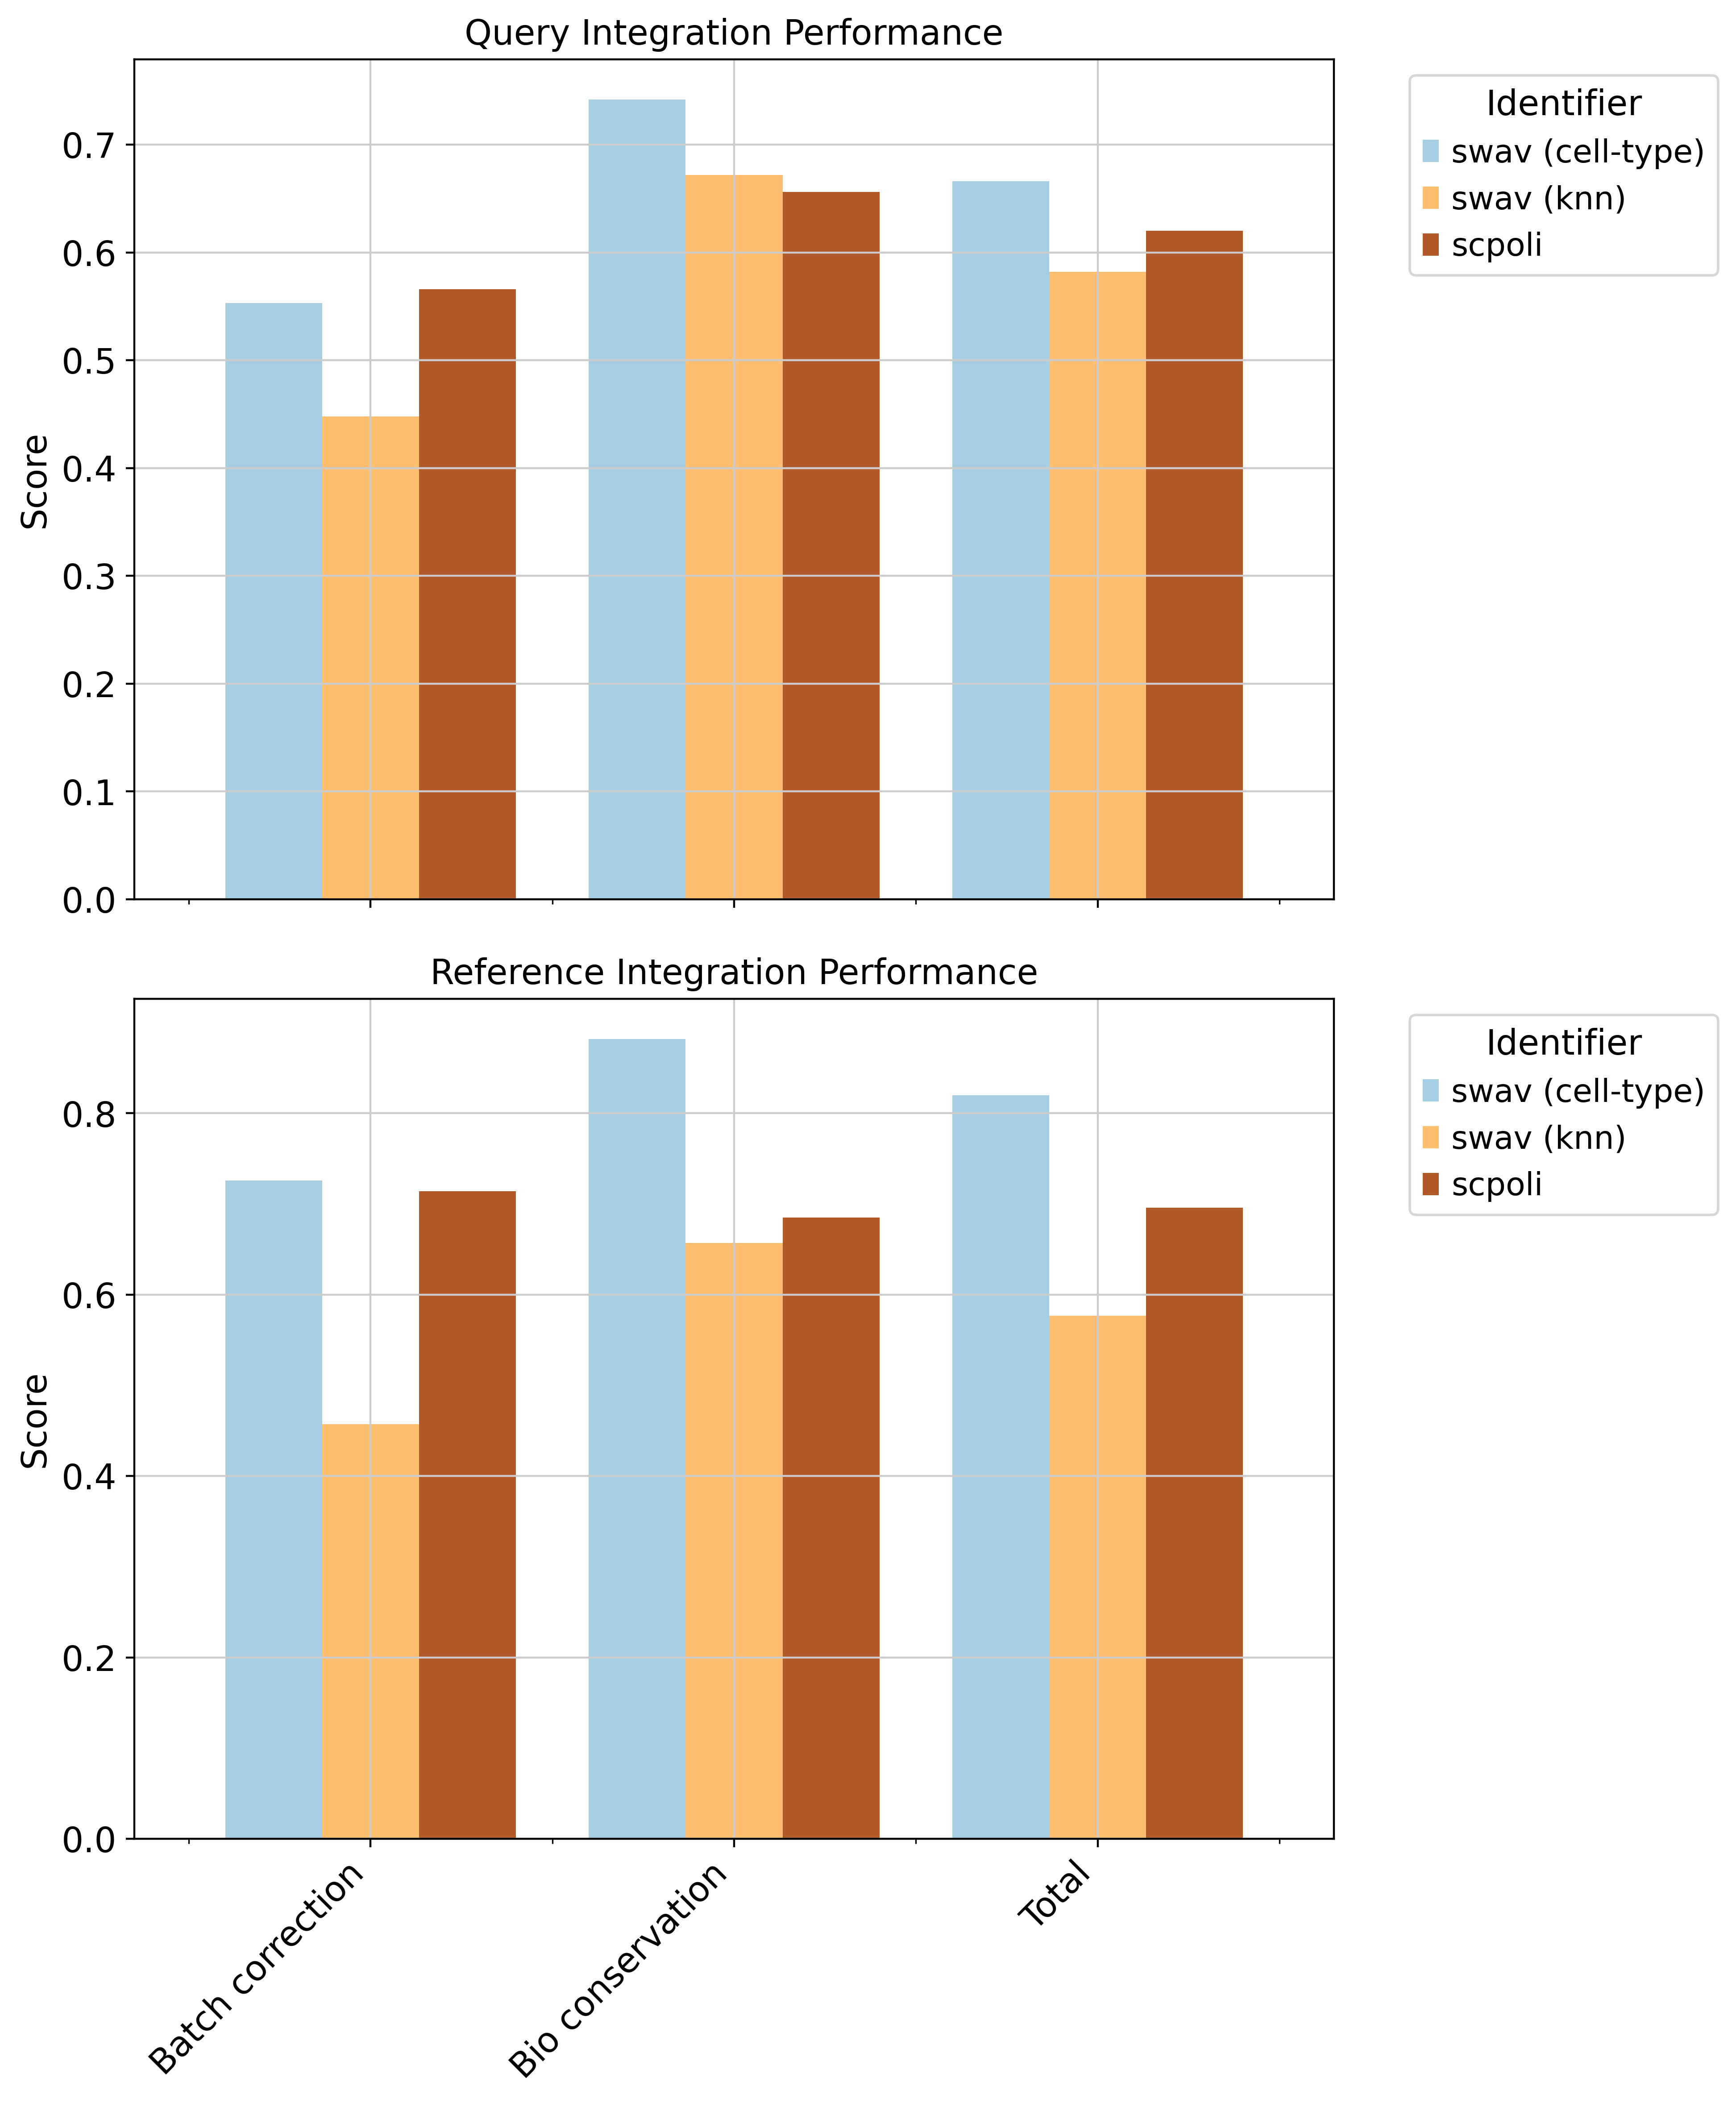

In [35]:
save_path = '/home/icb/fatemehs.hashemig/models/pbmc-immune/compare_bar.png'
plot_grouped_bar_two_stylers(ref, query, [0, 1, -1], ['swav (cell-type)', 'swav (knn)', 'scpoli'], save_path)

In [36]:
trainers[1].dump_path

'/home/icb/fatemehs.hashemig/models//pbmc-immune/swav-only_iloss0_closs0.0_num-prot-300_latent8-bs1024_aug-knn8_ep0.02_model-v1'

In [37]:
for trainer in trainers:
    print(trainer.dump_path)


/home/icb/fatemehs.hashemig/models//pbmc-immune/swav-only_iloss0_closs0.0_num-prot-300_latent8-bs1024_aug-cell_type8_ep0.02_model-v1
/home/icb/fatemehs.hashemig/models//pbmc-immune/swav-only_iloss0_closs0.0_num-prot-300_latent8-bs1024_aug-knn8_ep0.02_model-v1
/home/icb/fatemehs.hashemig/models//pbmc-immune/scpoli-pretrained_latent8_bs1024
/home/icb/fatemehs.hashemig/models//pbmc-immune/scpoli-both_latent8_bs1024
/home/icb/fatemehs.hashemig/models//pbmc-immune/scpoli-supervised_latent8_bs1024


## umaps

In [17]:
from PIL import Image
import os
from IPython.display import display

def load_and_show_image(image_path):
    """
    Load and display an image using PIL in a Jupyter Notebook.

    :param image_path: The file path to the image.
    """
    if os.path.exists(image_path):
        # Load the image
        img = Image.open(image_path)
        
        # Display the image in the notebook
        display(img)
    else:
        print(f"The file at path {image_path} does not exist.")

# Example usage:
# load_and_show_image('path/to/your/image.jpg')


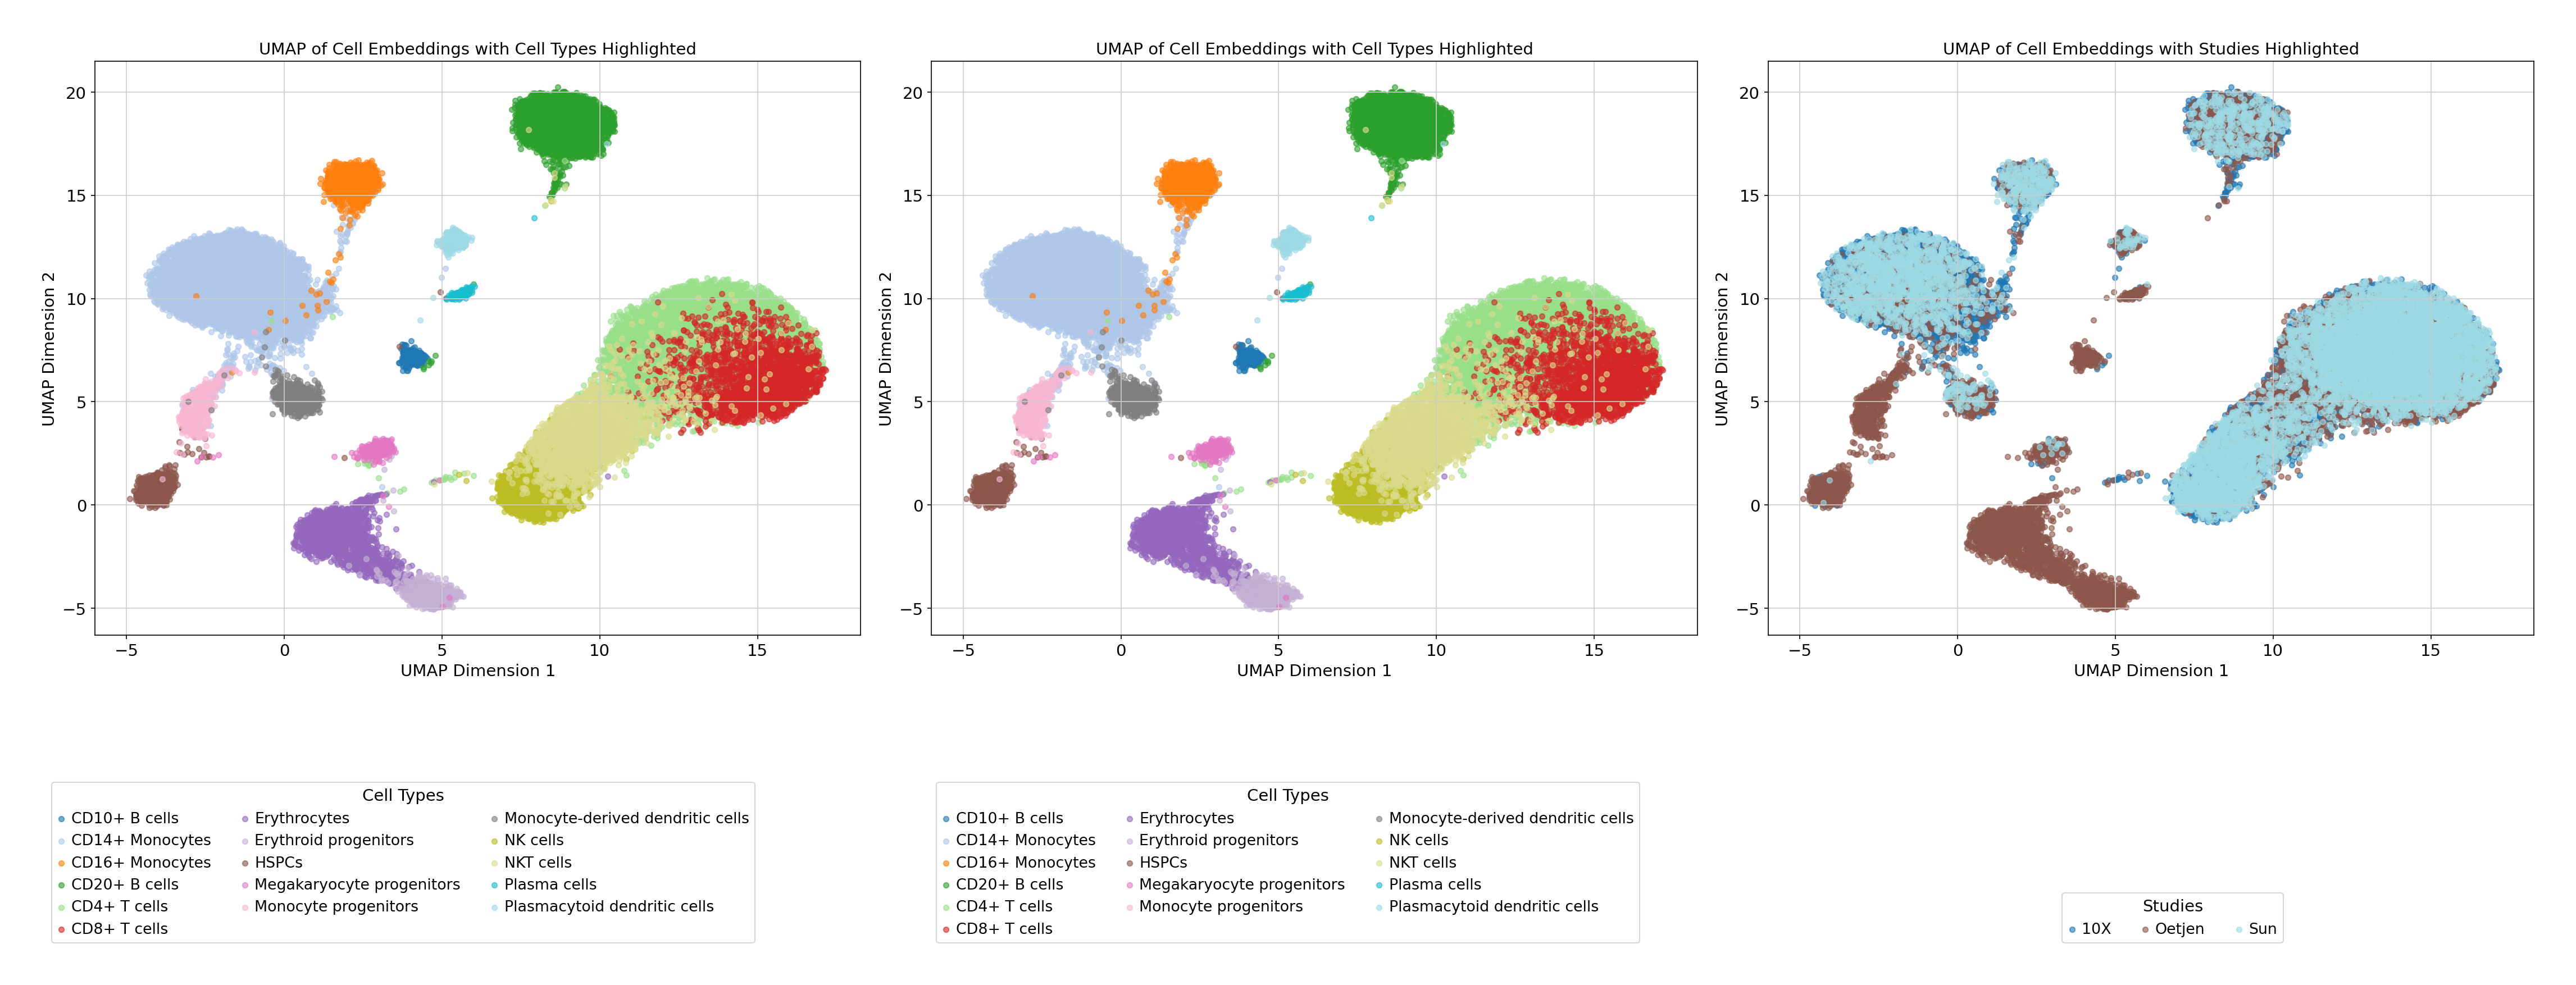

In [18]:
scpoli_ = trainers[-1]

path = scpoli_.dump_path
import os
ref = os.path.join(path, 'ref-umap.png')

load_and_show_image(ref)

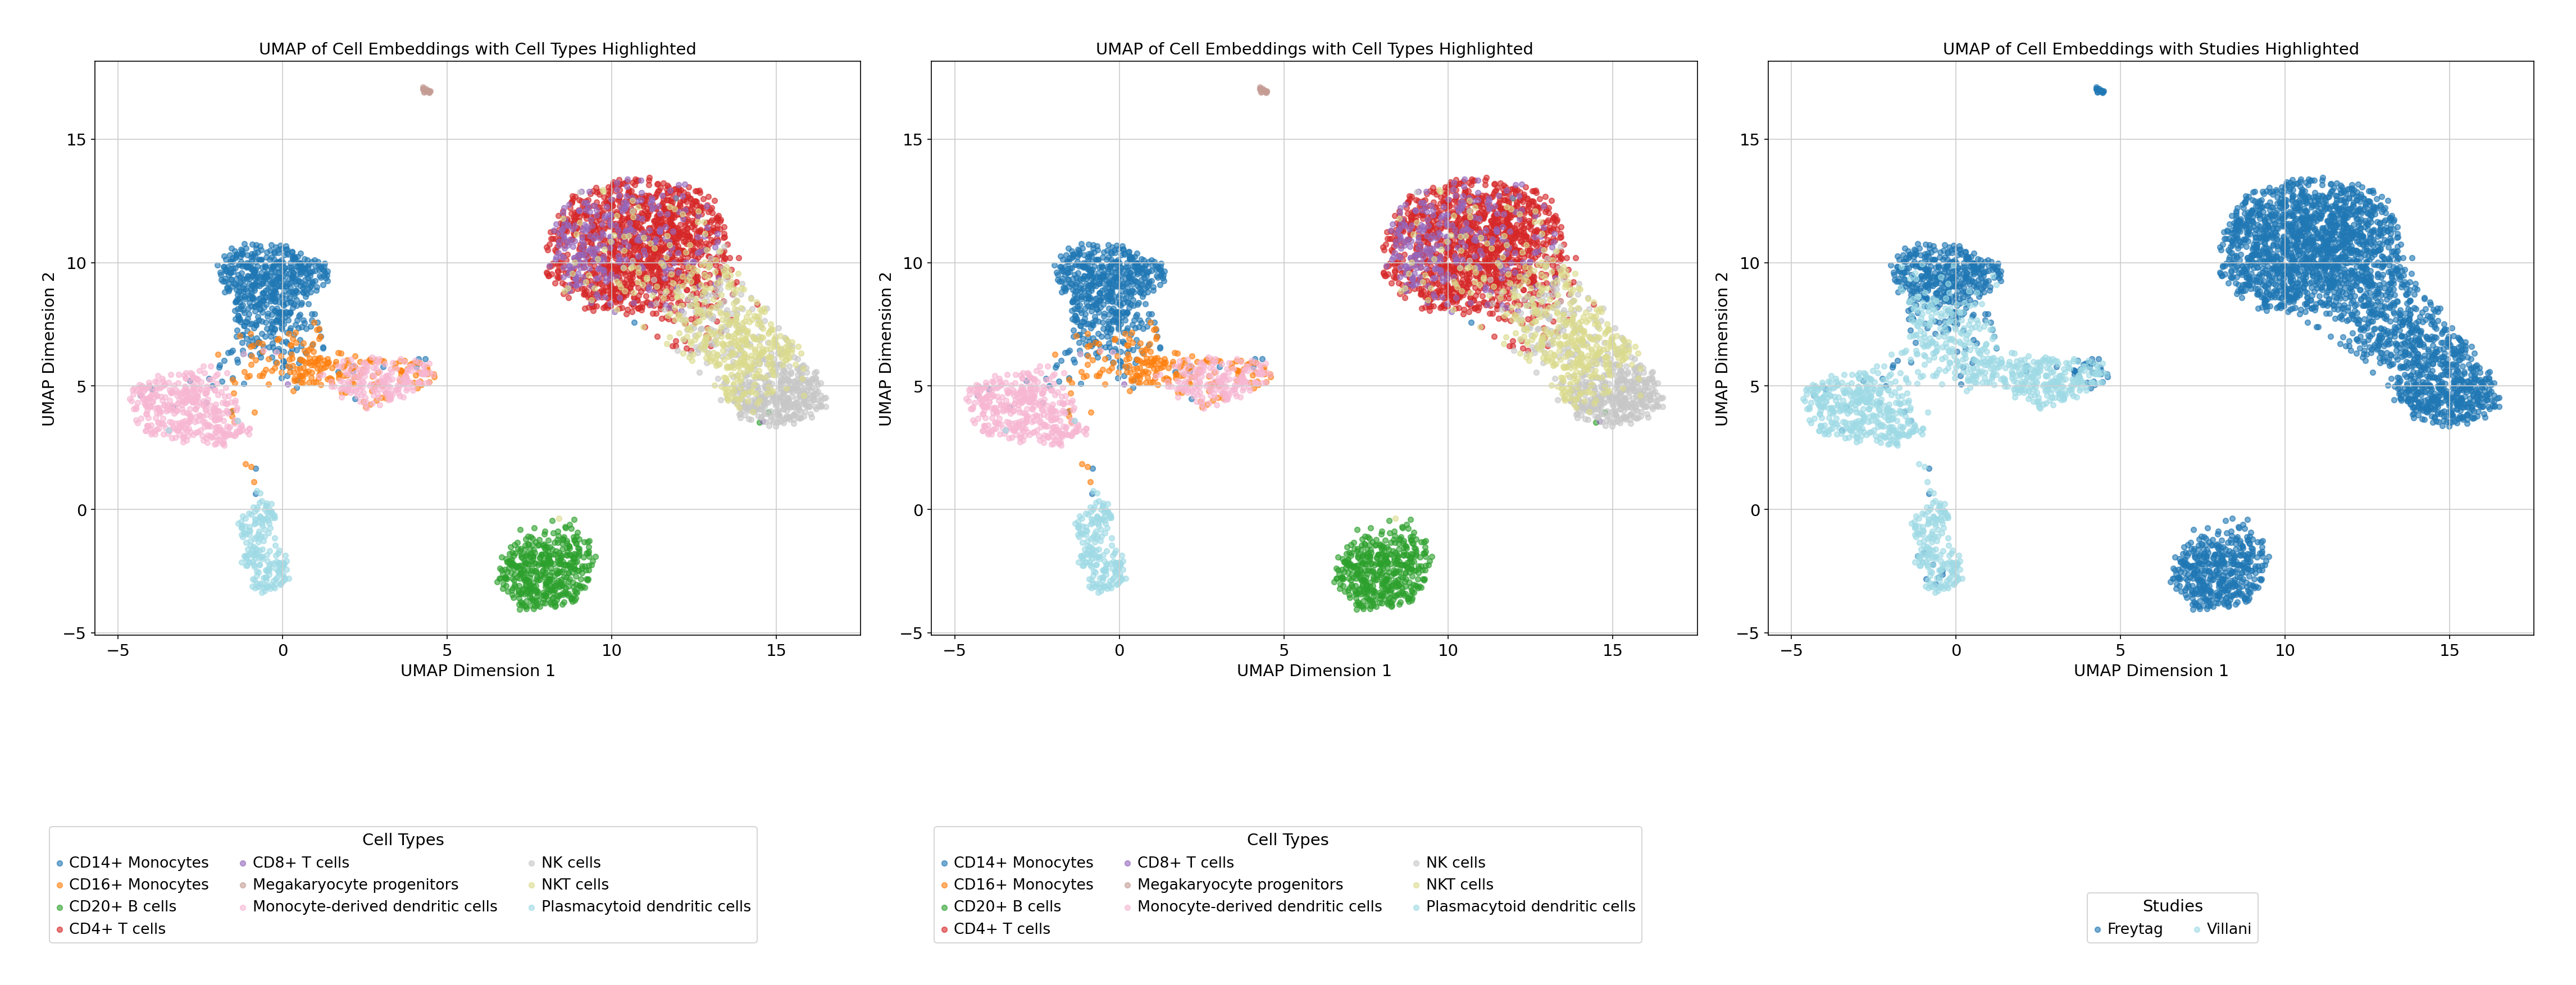

In [20]:
query = f'{path}/query-umap.png'
load_and_show_image(query)

# test semi supervised

In [41]:
from interpretable_ssl.trainers import adaptive_trainer
importlib.reload(adaptive_trainer)

from interpretable_ssl.trainers import swav
importlib.reload(swav)


<module 'interpretable_ssl.trainers.swav' from '/ictstr01/home/icb/fatemehs.hashemig/codes/interpretable-ssl/interpretable_ssl/trainers/swav.py'>

In [42]:
tr = swav.SwAV()
tr.setup()

loading data


/home/icb/fatemehs.hashemig/miniconda3/envs/lodechan_cloned/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
INFO - 08/27/24 15:17:21 - 0:00:00 - ============ Initialized logger ============
INFO - 08/27/24 15:17:21 - 0:00:00 - all_latent: None
                                     augmentation_type: knn
                                     base_lr: 4.8
                                     batch_size: 512
                                     batch_size_version: 2
                                     cell_type_key: cell_type
                                     checkpoint_freq: 25
                                     condition_key: study
                   

Embedding dictionary:
 	Num conditions: [3]
 	Embedding dim: [10]
Encoder Architecture:
	Input Layer in, out and cond: 4000 64 10
	Mean/Var Layer in/out: 64 8
Decoder Architecture:
	First Layer in, out and cond:  8 64 10
	Output Layer in/out:  64 4000 

swav model with l2n init


INFO - 08/27/24 15:13:51 - 0:00:00 - ============ Initialized logger ============
INFO - 08/27/24 15:13:51 - 0:00:00 - all_latent: None
                                     augmentation_type: knn
                                     base_lr: 4.8
                                     batch_size: 512
                                     batch_size_version: 2
                                     cell_type_key: cell_type
                                     checkpoint_freq: 25
                                     condition_key: study
                                     crops_for_assign: [0, 1]
                                     custom_cross_val: False
                                     cvae_loss_scaler: 0.0001
                                     cvae_reg: 0
                                     dataset: pbmc-immune
                                     dataset_id: pbmc-immune
                                     debug: False
                                     default_values: {'dataset

Embedding dictionary:
 	Num conditions: [3]
 	Embedding dim: [10]
Encoder Architecture:
	Input Layer in, out and cond: 4000 64 10
	Mean/Var Layer in/out: 64 8
Decoder Architecture:
	First Layer in, out and cond:  8 64 10
	Output Layer in/out:  64 4000 

swav model with l2n init


In [38]:
tr.pretraining_epochs = 1
tr.fine_tuning_epochs = 1

In [40]:
tr.ref

In [43]:


tr.train_semi_supervised()

AttributeError: 'Subset' object has no attribute 'adata'